In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


In [3]:
import seaborn as sn

In [237]:
data=pd.read_csv("/content/student college data (1).csv")

In [ ]:
data.isnull().sum()

In [ ]:
data.head()

In [7]:
gender=data["gender"]

In [8]:
interest=data["interest"]

In [9]:
residence=data["residence"]

In [10]:
average_grades=data["average_grades"]

In [11]:
house_area=data["house_area"]

In [12]:
parent_salary	=data["parent_salary"]

In [13]:
parent_age=data["parent_age"]

In [14]:
type_school=data["type_school"]

In [ ]:
data.plot(figsize=[15,15],subplots=True)

In [ ]:
sn.displot(data=data,x="parent_salary",kde=True,bins=200,color="red")

In [ ]:
sn.displot(data=data,x="house_area",kde=True,bins=200,color="black")

In [ ]:
sn.displot(data=data,x="average_grades",kde=True,bins=200)

In [ ]:
sn.displot(data=data,x="parent_age",bins=200,color="green",kde=True)

In [ ]:
sn.barplot(data=data,x="parent_salary",y="residence",hue="interest")


In [ ]:
sn.barplot(data=data,x="parent_salary",y="residence",hue="type_school")

In [ ]:
sn.barplot(data=data,x="parent_salary",y="residence",hue="gender")

In [ ]:
sn.barplot(data=data,x="house_area",y="residence",hue="school_accreditation")

In [ ]:
sn.barplot(data=data,x="average_grades",y="gender",hue="interest")

In [ ]:
sn.relplot(data=data,y="interest",x="parent_age",style="gender",col="residence")

In [ ]:
sn.scatterplot(data=data,y="interest",x="parent_age",style="gender",hue="residence")

In [ ]:
data.describe()

In [ ]:
sn.boxplot(data=data,x="parent_salary",y="interest")

In [ ]:
for c in data.columns:
  print(c)

In [ ]:
sn.pairplot(data,x_vars=["interest"],y_vars=["parent_salary","average_grades","house_area","parent_age"],size=6)


In [262]:
data.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
0,1,1,1,1,1,56,6950000,83.0,84.09,0
1,1,1,1,1,1,57,4410000,76.8,86.91,0
2,1,0,0,0,1,50,6500000,80.6,87.43,0
3,0,0,1,0,0,49,6600000,78.2,82.12,1
4,1,1,0,0,1,57,5250000,75.1,86.79,0


In [249]:
pd.unique(data["school_accreditation"])

array(['A', 'B'], dtype=object)

In [250]:
data["school_accreditation"]=data["school_accreditation"].apply({"A":1,"B":0}.get)

In [251]:
pd.unique(data["type_school"])

array(['Academic', 'Vocational'], dtype=object)

In [252]:
data["type_school"]=data["type_school"].apply({"Academic":1,"Vocational":0}.get)

In [253]:
pd.unique(data["gender"])

array(['Male', 'Female'], dtype=object)

In [254]:
data["gender"]=data["gender"].apply({"Male":1,"Female":0}.get)

In [255]:
pd.unique(data["interest"])

array(['Less Interested', 'Very Interested', 'Uncertain',
       'Not Interested', 'Quiet Interested'], dtype=object)

In [256]:
data["interest"]=data["interest"].apply({"Less Interested":1,"Very Interested":0,"Uncertain":2,"Not Interested":3,"Quiet Interested":4}.get)

In [257]:
pd.unique(data["residence"])

array(['Urban', 'Rural'], dtype=object)

In [258]:
data["residence"]=data["residence"].apply({"Urban":1,"Rural":0}.get)

In [259]:
pd.unique(data["parent_was_in_college"])

array([0, 1])

In [260]:
data["parent_was_in_college"]=data["parent_was_in_college"].apply({True:1,False:0}.get)

In [261]:
import scipy.cluster.hierarchy as sh

Text(0.5, 1.0, 'dendro')

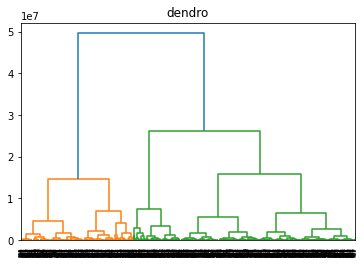

In [266]:
d=sh.dendrogram(sh.linkage(data,method="ward"))
plt.title("dendro")

In [268]:
from sklearn.cluster import AgglomerativeClustering

In [269]:
xolo=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")

In [270]:
xolo.fit(data)

AgglomerativeClustering(n_clusters=3)

In [271]:
xolo.fit_predict(data)

array([2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2,
       0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2,
       1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0,